In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
agriculture_data = pd.read_csv('faostat_cleaned_long.csv')
climate_data = pd.read_csv('world_bank_cleaned_long.csv')

In [3]:
agriculture_data.head()

,Area,Item,Element,Unit,Year,Value
0,Argentina,"Almonds, in shell",Area harvested,ha,2015,382.00
1,Argentina,"Almonds, in shell",Yield,kg/ha,2015,1873.50
2,Argentina,"Almonds, in shell",Production,t,2015,714.86
3,Argentina,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested,ha,2015,8431.00
4,Argentina,"Anise, badian, coriander, cumin, caraway, fenn...",Yield,kg/ha,2015,864.70


In [4]:
agriculture_data.drop(['Item'], axis=1)

,Area,Element,Unit,Year,Value
0,Argentina,Area harvested,ha,2015,382.00
1,Argentina,Yield,kg/ha,2015,1873.50
2,Argentina,Production,t,2015,714.86
3,Argentina,Area harvested,ha,2015,8431.00
4,Argentina,Yield,kg/ha,2015,864.70
...,...,...,...,...,...
45425,Venezuela (Bolivarian Republic of),Yield,kg/ha,2021,53325.90
45426,Venezuela (Bolivarian Republic of),Production,t,2021,3240524.75
45427,Venezuela (Bolivarian Republic of),Area harvested,ha,2021,61971.00
45428,Venezuela (Bolivarian Republic of),Yield,kg/ha,2021,19990.40


In [5]:
climate_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Argentina,ARG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,591.0
1,Brazil,BRA,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,1761.0
2,Chile,CHL,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,1522.0
3,Colombia,COL,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,3240.0
4,Costa Rica,CRI,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,2926.0


In [6]:
climate_data.drop(['Indicator Code','Country Code'], axis=1)

,Country Name,Indicator Name,Year,Value
0,Argentina,Average precipitation in depth (mm per year),2015,591.0
1,Brazil,Average precipitation in depth (mm per year),2015,1761.0
2,Chile,Average precipitation in depth (mm per year),2015,1522.0
3,Colombia,Average precipitation in depth (mm per year),2015,3240.0
4,Costa Rica,Average precipitation in depth (mm per year),2015,2926.0
...,...,...,...,...
114,Panama,Average precipitation in depth (mm per year),2021,2928.0
115,Peru,Average precipitation in depth (mm per year),2021,1738.0
116,Paraguay,Average precipitation in depth (mm per year),2021,1130.0
117,El Salvador,Average precipitation in depth (mm per year),2021,1784.0


In [7]:
agriculture_data.dropna(inplace=True)
climate_data.dropna(inplace=True)

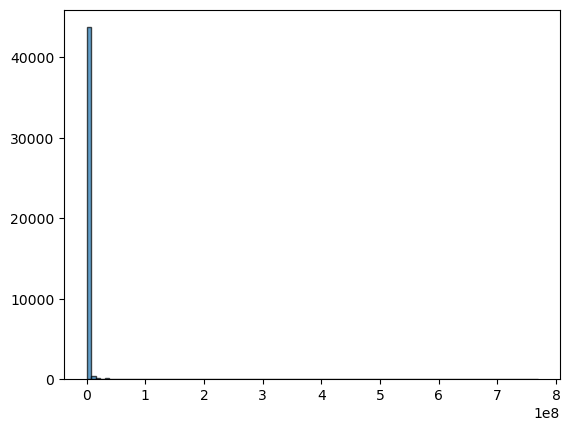

In [8]:
plt.hist(agriculture_data['Value'], bins=100, edgecolor='k', alpha=0.7)
plt.show()

In [9]:
agriculture_data['Value']

0            382.00
1           1873.50
2            714.86
3           8431.00
4            864.70
            ...    
45425      53325.90
45426    3240524.75
45427      61971.00
45428      19990.40
45429    1238815.62
Name: Value, Length: 44651, dtype: float64

In [10]:
agriculture_data.shape

(44651, 6)

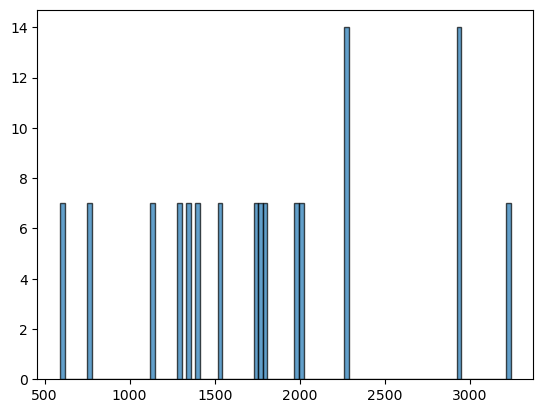

In [11]:
plt.hist(climate_data['Value'], bins=100, edgecolor='k', alpha=0.7)
plt.show()

In [12]:
climate_data.shape

(119, 6)

In [13]:
climate_data['Country Name'].value_counts()

Argentina             7
Honduras              7
El Salvador           7
Paraguay              7
Peru                  7
Panama                7
Nicaragua             7
Mexico                7
Guatemala             7
Brazil                7
Ecuador               7
Dominican Republic    7
Cuba                  7
Costa Rica            7
Colombia              7
Chile                 7
Uruguay               7
Name: Country Name, dtype: int64

In [14]:
agriculture_data['Area'].value_counts()

Mexico                                3505
Peru                                  3103
Argentina                             2806
Ecuador                               2776
Brazil                                2742
Colombia                              2716
Chile                                 2592
Bolivia (Plurinational State of)      2549
Venezuela (Bolivarian Republic of)    2309
Guatemala                             2279
Costa Rica                            2174
Paraguay                              2114
Honduras                              2058
Dominican Republic                    2017
Uruguay                               1888
Cuba                                  1886
El Salvador                           1870
Nicaragua                             1672
Panama                                1595
Name: Area, dtype: int64

In [15]:
agriculture_data.rename(columns={'Area': 'Country Name'}, inplace=True)

agriculture_data = agriculture_data[(agriculture_data['Year'] >= 2015) & (agriculture_data['Year'] <= 2021)]
climate_data = climate_data[(climate_data['Year'] >= 2015) & (climate_data['Year'] <= 2021)]

agriculture_data.dropna(inplace=True)
climate_data.dropna(inplace=True)

agriculture_data.head()

,Country Name,Item,Element,Unit,Year,Value
0,Argentina,"Almonds, in shell",Area harvested,ha,2015,382.00
1,Argentina,"Almonds, in shell",Yield,kg/ha,2015,1873.50
2,Argentina,"Almonds, in shell",Production,t,2015,714.86
3,Argentina,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested,ha,2015,8431.00
4,Argentina,"Anise, badian, coriander, cumin, caraway, fenn...",Yield,kg/ha,2015,864.70


In [16]:
climate_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Argentina,ARG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,591.0
1,Brazil,BRA,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,1761.0
2,Chile,CHL,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,1522.0
3,Colombia,COL,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,3240.0
4,Costa Rica,CRI,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2015,2926.0


In [17]:
combined_data = pd.merge(agriculture_data, climate_data, on=['Country Name', 'Year'], suffixes=('_agriculture', '_climate'))
combined_data.head()

,Country Name,Item,Element,Unit,Year,Value_agriculture,Country Code,Indicator Name,Indicator Code,Value_climate
0,Argentina,"Almonds, in shell",Area harvested,ha,2015,382.00,ARG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,591.0
1,Argentina,"Almonds, in shell",Yield,kg/ha,2015,1873.50,ARG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,591.0
2,Argentina,"Almonds, in shell",Production,t,2015,714.86,ARG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,591.0
3,Argentina,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested,ha,2015,8431.00,ARG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,591.0
4,Argentina,"Anise, badian, coriander, cumin, caraway, fenn...",Yield,kg/ha,2015,864.70,ARG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,591.0


In [18]:
combined_data.shape

(39793, 10)

In [19]:
cor = combined_data[['Value_agriculture','Value_climate']].corr()
cor

,Value_agriculture,Value_climate
Value_agriculture,1.000000,-0.020189
Value_climate,-0.020189,1.000000


<AxesSubplot:>

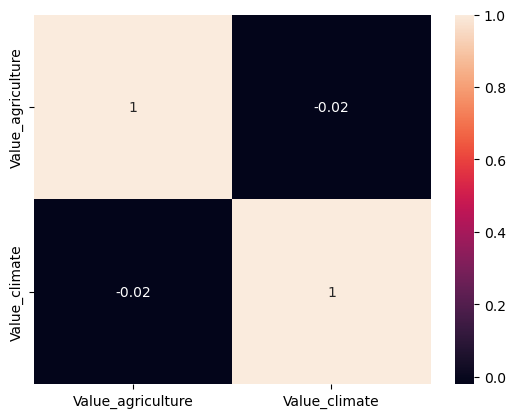

In [20]:
sns.heatmap(cor, annot=True)

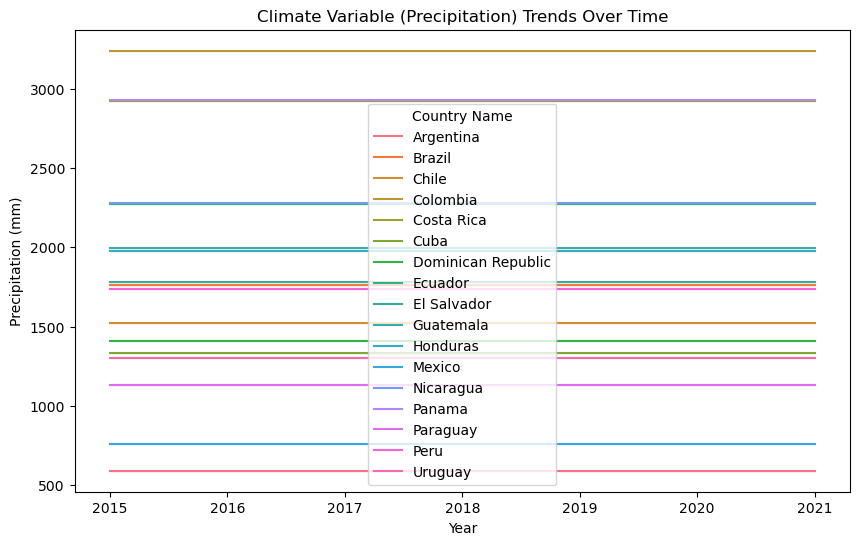

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='Year', y='Value_climate', hue='Country Name')
plt.title('Climate Variable (Precipitation) Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.show()

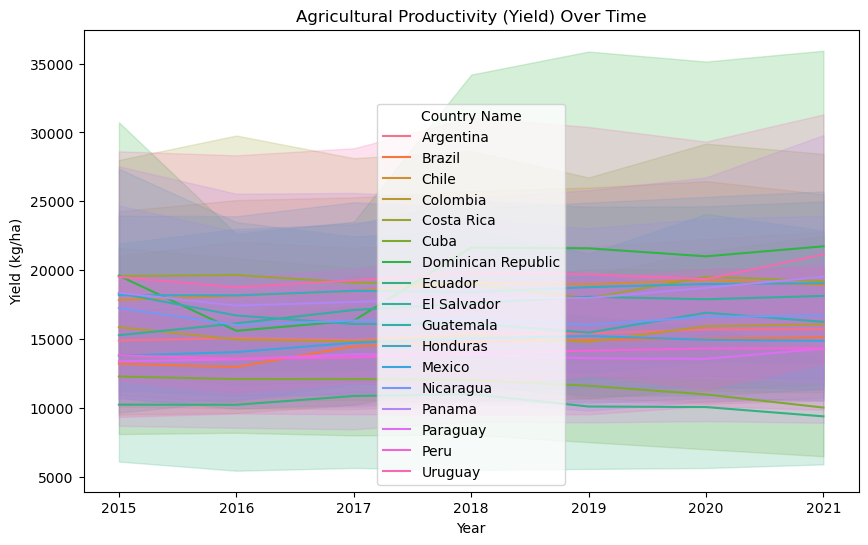

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data[combined_data['Element'] == 'Yield'], x='Year', y='Value_agriculture', hue='Country Name')
plt.title('Agricultural Productivity (Yield) Over Time')
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.show()


Correlation between precipitation and yield: 0.011469114116899843


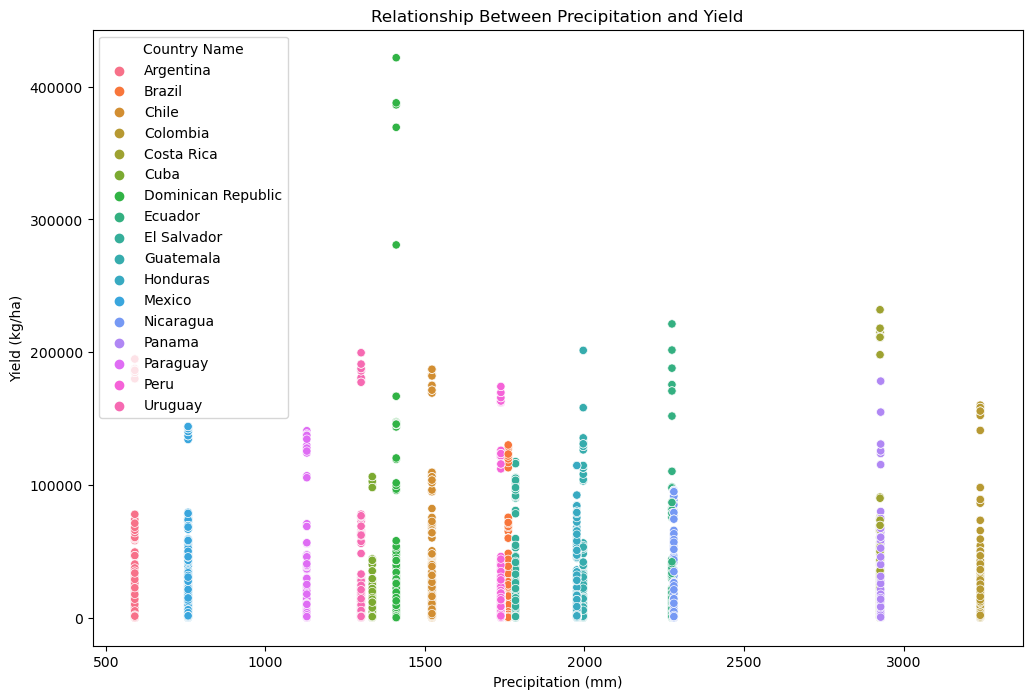

In [23]:
yield_data = combined_data[combined_data['Element'] == 'Yield']

correlation = yield_data['Value_climate'].corr(yield_data['Value_agriculture'])
print(f'Correlation between precipitation and yield: {correlation}')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=yield_data, x='Value_climate', y='Value_agriculture', hue='Country Name')
plt.title('Relationship Between Precipitation and Yield')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Yield (kg/ha)')
plt.show()

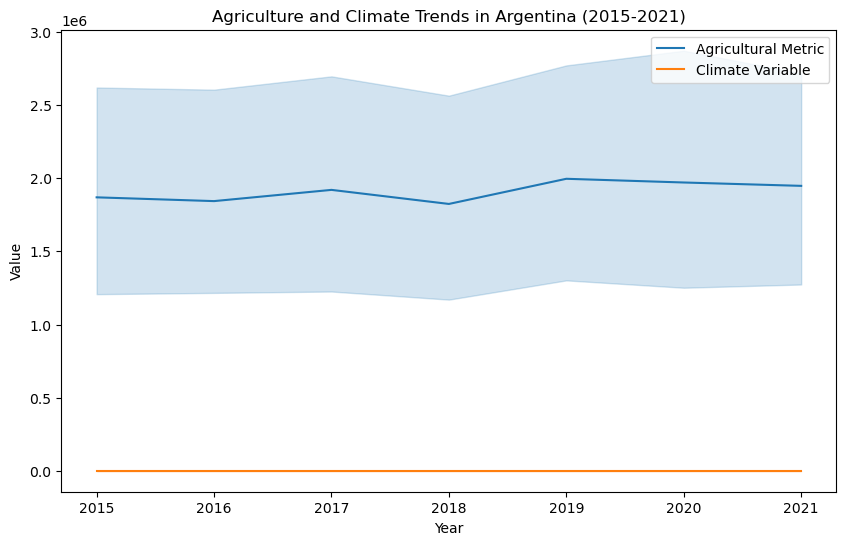

In [24]:
argentina_data = combined_data[combined_data['Country Name'] == 'Argentina']

plt.figure(figsize=(10, 6))
sns.lineplot(data=argentina_data, x='Year', y='Value_agriculture', label='Agricultural Metric')
sns.lineplot(data=argentina_data, x='Year', y='Value_climate', label='Climate Variable')
plt.title('Agriculture and Climate Trends in Argentina (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


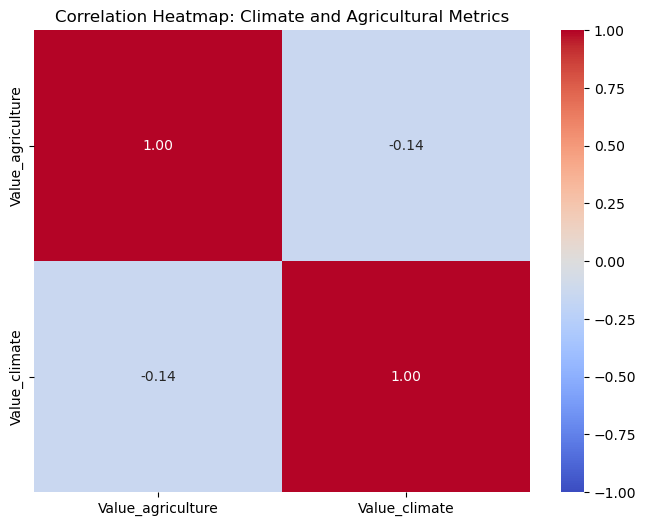

In [25]:
pivot_data = combined_data.pivot_table(index=['Country Name', 'Year'], 
                                       values=['Value_climate', 'Value_agriculture'], 
                                       aggfunc=np.mean)

correlation_matrix = pivot_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Climate and Agricultural Metrics')
plt.show()
